#Juan Camilo Restrepo Velez
#William Leonardo Andrade Collazos
#Wilder Valencia Ocampo


# ProyectoMineria_AnalisisPredictivo

1. Preparación de Datos
2. División de los datos
3. Aprendizaje del Modelo
4. Evaluación del Modelo
5. Predicción de Datos Futuros

In [324]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Preparación de Datos
-  Cargamos los datos
-  Conocemos los datos con estadísticos
- Seleccion de variables
- Limpieza de atipicos
- Limpieza de nulos
- Transformación de datos  (sklearn sólo analiza variables numéricas)

In [325]:
data = data = pd.read_csv("Datos.csv", sep=",",na_values="unknown")
data.head()

,age,job,marital,education,default,housing,loan,month,day_of_week,campaign,previous,cons.price.idx,cons.conf.idx,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,may,mon,1,0,93.994,-36.4,5191.0,no
1,57,services,married,high.school,no,no,no,may,mon,1,0,93.994,-36.4,5191.0,no
2,37,services,married,high.school,no,yes,no,may,mon,1,0,93.994,-36.4,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,may,mon,1,0,93.994,-36.4,5191.0,no
4,56,services,married,high.school,no,no,yes,may,mon,1,0,93.994,-36.4,5191.0,no


In [326]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   month           41188 non-null  object 
 8   day_of_week     41188 non-null  object 
 9   campaign        41188 non-null  int64  
 10  previous        41188 non-null  int64  
 11  cons.price.idx  41188 non-null  float64
 12  cons.conf.idx   41188 non-null  float64
 13  nr.employed     41188 non-null  float64
 14  y               41188 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 4.7+ MB


In [327]:
#Corrección del tipo de datos
data['job']=data['job'].astype('category')
data['marital']=data['marital'].astype('category')
data['education']=data['education'].astype('category')
data['default']=data['default'].astype('category')
data['housing']=data['housing'].astype('category')
data['loan']=data['loan'].astype('category')
data['month']=data['month'].astype('category')
data['day_of_week']=data['day_of_week'].astype('category')
data['y']=data['y'].astype('category')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   month           41188 non-null  category
 8   day_of_week     41188 non-null  category
 9   campaign        41188 non-null  int64   
 10  previous        41188 non-null  int64   
 11  cons.price.idx  41188 non-null  float64 
 12  cons.conf.idx   41188 non-null  float64 
 13  nr.employed     41188 non-null  float64 
 14  y               41188 non-null  category
dtypes: category(9), float64(3), int64(3)
memory usage: 2.2 MB


In [328]:
#Descripción de variables numéricas
print(data.describe())

               age      campaign  ...  cons.conf.idx   nr.employed
count  41188.00000  41188.000000  ...   41188.000000  41188.000000
mean      40.02406      2.567593  ...     -40.502600   5167.035911
std       10.42125      2.770014  ...       4.628198     72.251528
min       17.00000      1.000000  ...     -50.800000   4963.600000
25%       32.00000      1.000000  ...     -42.700000   5099.100000
50%       38.00000      2.000000  ...     -41.800000   5191.000000
75%       47.00000      3.000000  ...     -36.400000   5228.100000
max       98.00000     56.000000  ...     -26.900000   5228.100000

[8 rows x 6 columns]


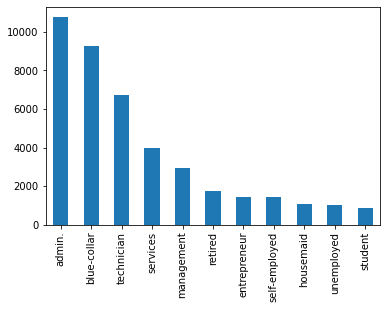

In [329]:
#Descripción variables categóricas
data['job'].value_counts().plot(kind='bar')

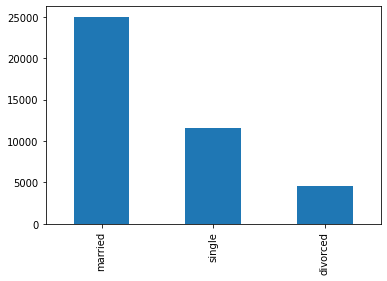

In [330]:
data['marital'].value_counts().plot(kind='bar')

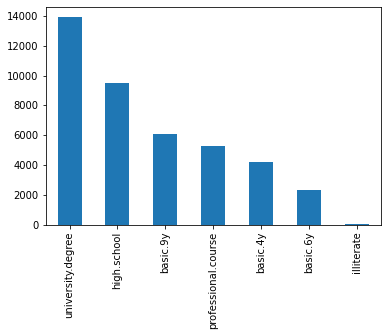

In [331]:
data['education'].value_counts().plot(kind='bar')

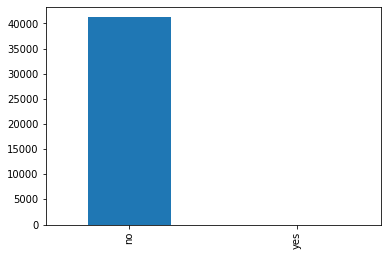

In [332]:
data['default'].value_counts().plot(kind='bar')

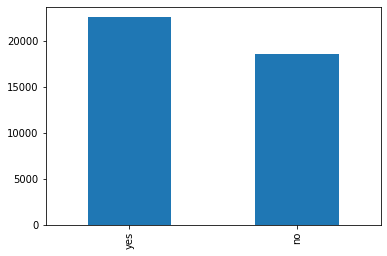

In [333]:
data['housing'].value_counts().plot(kind='bar')

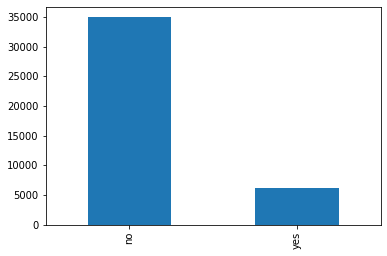

In [334]:
data['loan'].value_counts().plot(kind='bar')

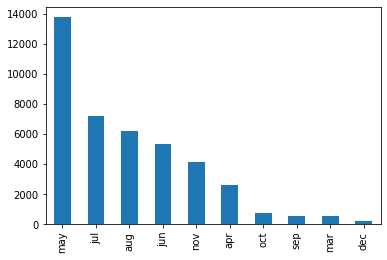

In [335]:
data['month'].value_counts().plot(kind='bar')

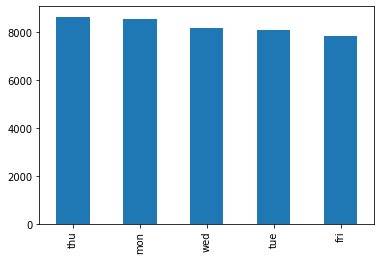

In [336]:
data['day_of_week'].value_counts().plot(kind='bar')

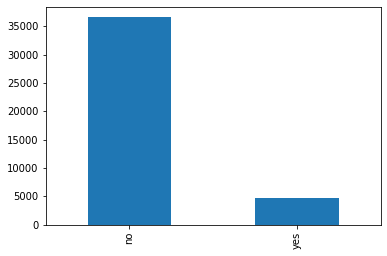

In [337]:
data['y'].value_counts().plot(kind='bar')

In [338]:
#Dummies
dummiesClase=pd.get_dummies(data['job'])
data=data.drop('job', axis=1)
data=data.join(dummiesClase)

dummiesClase=pd.get_dummies(data['marital'])
data=data.drop('marital', axis=1)
data=data.join(dummiesClase)

dummiesClase=pd.get_dummies(data['education'])
data=data.drop('education', axis=1)
data=data.join(dummiesClase)

dummiesClase=pd.get_dummies(data['month'])
data=data.drop('month', axis=1)
data=data.join(dummiesClase)

dummiesClase=pd.get_dummies(data['day_of_week'])
data=data.drop('day_of_week', axis=1)
data=data.join(dummiesClase)

data.head()

,age,default,housing,loan,campaign,previous,cons.price.idx,cons.conf.idx,nr.employed,y,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,divorced,married,single,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,apr,aug,dec,jul,jun,mar,may,nov,oct,sep,fri,mon,thu,tue,wed
0,56,no,no,no,1,0,93.994,-36.4,5191.0,no,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,57,no,no,no,1,0,93.994,-36.4,5191.0,no,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,37,no,yes,no,1,0,93.994,-36.4,5191.0,no,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,40,no,no,no,1,0,93.994,-36.4,5191.0,no,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,56,no,no,yes,1,0,93.994,-36.4,5191.0,no,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [339]:
#Encoders
data['default']=data['default'].replace({"yes": 1, "no": 0})
data['housing']=data['housing'].replace({"yes": 1, "no": 0})
data['loan']=data['loan'].replace({"yes": 1, "no": 0})
data['y']=data['y'].replace({"yes": 1, "no": 0})
data.head()

,age,default,housing,loan,campaign,previous,cons.price.idx,cons.conf.idx,nr.employed,y,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,divorced,married,single,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,apr,aug,dec,jul,jun,mar,may,nov,oct,sep,fri,mon,thu,tue,wed
0,56,0,0,0,1,0,93.994,-36.4,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,57,0,0,0,1,0,93.994,-36.4,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,37,0,1,0,1,0,93.994,-36.4,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,40,0,0,0,1,0,93.994,-36.4,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,56,0,0,1,1,0,93.994,-36.4,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


#2. Division 70-30

In [340]:
#División 70-30
from sklearn.model_selection import train_test_split
X = data.drop('y', axis = 1) 
Y = data['y']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)
print(f'70% --> {Y_train.count()} Registros')
print(f'30% --> {Y_test.count()} Registros')

70% --> 28831 Registros
30% --> 12357 Registros


# 3. Aprendizaje del Modelo

##A. Backpropagation

In [341]:
#Creación del modelo con el conjunto de entrenamiento
from sklearn.neural_network import MLPClassifier
model_A = MLPClassifier(activation="logistic",hidden_layer_sizes=(23),learning_rate="adaptive",learning_rate_init=0.9,
                        momentum=0.3,max_iter=50,verbose=True,random_state=1)
model_A.fit(X_train, Y_train)





Iteration 1, loss = 0.91825856
Iteration 2, loss = 0.36699067
Iteration 3, loss = 0.35985521
Iteration 4, loss = 0.36801649
Iteration 5, loss = 0.38509021
Iteration 6, loss = 0.37319136
Iteration 7, loss = 0.36875883
Iteration 8, loss = 0.37437705
Iteration 9, loss = 0.38282694
Iteration 10, loss = 0.37510448
Iteration 11, loss = 0.37210864
Iteration 12, loss = 0.38751842
Iteration 13, loss = 0.38169226
Iteration 14, loss = 0.36859002
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=23, learning_rate='adaptive',
              learning_rate_init=0.9, max_fun=15000, max_iter=50, momentum=0.3,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [342]:
print(model_A.coefs_)
print(model_A.intercepts_)

[array([[-2.68342888e-03,  7.76592068e-24,  2.23849751e-02, ...,
        -3.15808509e+00,  7.77251708e-45, -4.36309514e+00],
       [-1.55054987e-17, -4.91451832e-26,  6.12209412e-34, ...,
        -3.92924482e-35,  4.14760560e-34, -2.87287607e-07],
       [ 2.59975168e-46, -5.86670020e-27,  2.33108841e-44, ...,
        -5.04286382e-22,  1.43728703e-42, -1.85024213e-01],
       ...,
       [-2.76448438e-45, -1.19000407e-25,  2.40225614e-44, ...,
         9.47678549e-46, -4.45850579e-44, -1.00473241e-02],
       [-1.75873194e-45,  1.50036041e-26, -1.01294538e-44, ...,
         8.37164304e-35,  8.62402309e-41, -2.83750637e-09],
       [ 8.64043117e-43,  5.34336605e-25, -1.53544162e-44, ...,
         1.52676099e-44,  2.80979951e-35, -5.69671807e-03]]), array([[-1.38300307],
       [-1.20630851],
       [-6.73592504],
       [-3.9556995 ],
       [-0.11926276],
       [-0.74163491],
       [-1.42128408],
       [-1.65128964],
       [-5.02373566],
       [-2.22648301],
       [-4.5676428 ],

##B. DeepLearning

In [343]:
#Creación del modelo con el conjunto de entrenamiento
from keras.models import Sequential
from keras.layers.core import Dense
model_B=Sequential()
model_B.add(Dense(45,input_dim=45, activation='relu'))
model_B.add(Dense(20, activation='relu'))
model_B.add(Dense(1, activation='sigmoid'))
model_B.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])
model_B.fit(X_train, Y_train, epochs=50)





Epoch 1/50
901/901 [==============================] - 1s 931us/step - loss: 0.1127 - accuracy: 0.8873
Epoch 2/50
901/901 [==============================] - 1s 920us/step - loss: 0.1127 - accuracy: 0.8873
Epoch 3/50
901/901 [==============================] - 1s 929us/step - loss: 0.1127 - accuracy: 0.8873
Epoch 4/50
901/901 [==============================] - 1s 950us/step - loss: 0.1127 - accuracy: 0.8873
Epoch 5/50
901/901 [==============================] - 1s 963us/step - loss: 0.1127 - accuracy: 0.8873
Epoch 6/50
901/901 [==============================] - 1s 938us/step - loss: 0.1127 - accuracy: 0.8873
Epoch 7/50
901/901 [==============================] - 1s 952us/step - loss: 0.1127 - accuracy: 0.8873
Epoch 8/50
901/901 [==============================] - 1s 949us/step - loss: 0.1127 - accuracy: 0.8873
Epoch 9/50
901/901 [==============================] - 1s 944us/step - loss: 0.1127 - accuracy: 0.8873
Epoch 10/50
901/901 [==============================] - 1s 938us/step - loss: 0.112

# 4. Evaluación del modelo sobre el conjunto de prueba
- Exactitud


##A. Backpropagation

In [344]:
#Evaluación sobre el conjunto de prueba
from sklearn import metrics
Y_pred = model_A.predict(X_test)
acc=metrics.accuracy_score(Y_test, Y_pred)
print(f'Exactitud MLP: {acc}')


Exactitud MLP: 0.8873512988589464


##B. DeepLearning

In [345]:
#Evaluación sobre el conjunto de prueba

print(f'Exactitud Aprendizaje Profundo: {model_B.evaluate(X_test, Y_test)}')

387/387 [==============================] - 0s 696us/step - loss: 0.1126 - accuracy: 0.8874
Exactitud Aprendizaje Profundo: [0.11264870315790176, 0.8873512744903564]


#5. Predicción de Datos Futuros

In [346]:
#Cargamos los datos futuros
data_fut = pd.read_csv("DatosFuturoPhyton.csv", sep=",",na_values="unknown")
data_fut.head()




,age,default,housing,loan,campaign,previous,cons.price.idx,cons.conf.idx,nr.employed,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,divorced,married,single,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,apr,aug,dec,jul,jun,mar,may,nov,oct,sep,fri,mon,thu,tue,wed
0,56,0,0,0,1,0,93.994,-36.4,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,57,0,0,0,1,0,93.994,-36.4,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,37,0,1,1,1,0,93.994,-36.4,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,40,0,0,0,1,0,93.994,-36.4,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,56,0,0,0,1,0,93.994,-36.4,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


##A. Backpropagation

In [347]:
#Prediccion
print("Red Neuronal Backpropagation")

Y_fut_A = model_A.predict(data_fut)
print(Y_fut_A)

Red Neuronal Backpropagation
[0 0 0 0 0 0]


##B. DeepLearning

In [348]:
#Prediccion
print("Red Neuronal Profunda")
Y_fut_B = model_B.predict(data_fut)
print(Y_fut_B.round())



Red Neuronal Profunda
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
